<a href="https://colab.research.google.com/github/hansuho113/Machine_learning/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_13%EC%A3%BC%EC%B0%A8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000, 784).astype(np.float32)/255.0
x_test = x_test.reshape(10000, 784).astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

4423680/4422102 [==============================] - 0s 0us/step


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


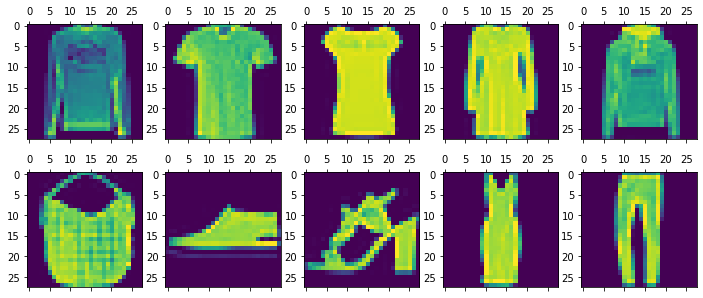

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

random_pick = np.random.randint(low=0, high=10000, size=10)
random_pick

figure = plt.figure()
figure.set_size_inches(12, 5)

axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2, 5, i))

tmp_list = []
for i in range(10):
    tmp = x_train[60000 - random_pick[i]]
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)

print(y_test[random_pick])

for i in range(10):
    axes[i].matshow(tmp_list[i])

In [4]:
n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden,
              activation='tanh',
              input_shape=(n_input, ),
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.add(Dense(units=n_output,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))

In [5]:
mlp.compile(loss='mean_squared_error',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy'])
hist = mlp.fit(x_train, y_train, batch_size=128, epochs=30,
               validation_data=(x_test, y_test),
               verbose=2)

res = mlp.evaluate(x_test, y_test, verbose=0)
print("accuracy= ", res[1]*100)

Epoch 1/30
469/469 - 4s - loss: 0.0580 - accuracy: 0.7557 - val_loss: 0.0338 - val_accuracy: 0.8281
Epoch 2/30
469/469 - 1s - loss: 0.0303 - accuracy: 0.8438 - val_loss: 0.0289 - val_accuracy: 0.8411
Epoch 3/30
469/469 - 1s - loss: 0.0271 - accuracy: 0.8569 - val_loss: 0.0267 - val_accuracy: 0.8518
Epoch 4/30
469/469 - 1s - loss: 0.0253 - accuracy: 0.8669 - val_loss: 0.0256 - val_accuracy: 0.8579
Epoch 5/30
469/469 - 1s - loss: 0.0238 - accuracy: 0.8749 - val_loss: 0.0257 - val_accuracy: 0.8570
Epoch 6/30
469/469 - 1s - loss: 0.0227 - accuracy: 0.8783 - val_loss: 0.0239 - val_accuracy: 0.8661
Epoch 7/30
469/469 - 1s - loss: 0.0217 - accuracy: 0.8845 - val_loss: 0.0252 - val_accuracy: 0.8676
Epoch 8/30
469/469 - 1s - loss: 0.0209 - accuracy: 0.8886 - val_loss: 0.0242 - val_accuracy: 0.8700
Epoch 9/30
469/469 - 1s - loss: 0.0201 - accuracy: 0.8922 - val_loss: 0.0224 - val_accuracy: 0.8737
Epoch 10/30
469/469 - 1s - loss: 0.0195 - accuracy: 0.8954 - val_loss: 0.0229 - val_accuracy: 0.8754

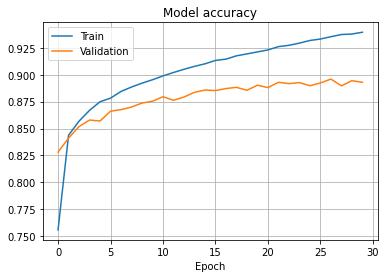

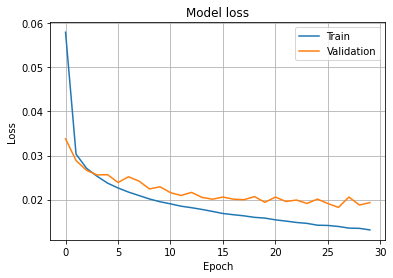

In [6]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.legend(['Train', "Validation"], loc='upper right')
plt.grid()
plt.show()

In [14]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype(np.float32)/255.0
x_test = x_test.reshape(10000, 784).astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



In [16]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


In [17]:
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

mlp = Sequential()

mlp.add(Dense(units=n_hidden1,
              activation='tanh',
              input_shape=(n_input, ),
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.add(Dense(units=n_output,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))


In [18]:
mlp.compile(loss='mean_squared_error',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy'])
hist = mlp.fit(x_train,
               y_train,
               batch_size=128,
               epochs=30,
               validation_data=(x_test, y_test),
               verbose=2)

res = mlp.evaluate(x_test, y_test, verbose=0)

print('accuracy= ', res[1]*100)

Epoch 1/30
469/469 - 2s - loss: 0.0258 - accuracy: 0.8964 - val_loss: 0.0129 - val_accuracy: 0.9441
Epoch 2/30
469/469 - 1s - loss: 0.0104 - accuracy: 0.9529 - val_loss: 0.0087 - val_accuracy: 0.9585
Epoch 3/30
469/469 - 1s - loss: 0.0070 - accuracy: 0.9669 - val_loss: 0.0067 - val_accuracy: 0.9674
Epoch 4/30
469/469 - 1s - loss: 0.0054 - accuracy: 0.9743 - val_loss: 0.0057 - val_accuracy: 0.9718
Epoch 5/30
469/469 - 1s - loss: 0.0045 - accuracy: 0.9792 - val_loss: 0.0051 - val_accuracy: 0.9726
Epoch 6/30
469/469 - 1s - loss: 0.0038 - accuracy: 0.9822 - val_loss: 0.0047 - val_accuracy: 0.9758
Epoch 7/30
469/469 - 1s - loss: 0.0034 - accuracy: 0.9849 - val_loss: 0.0047 - val_accuracy: 0.9758
Epoch 8/30
469/469 - 1s - loss: 0.0031 - accuracy: 0.9857 - val_loss: 0.0045 - val_accuracy: 0.9779
Epoch 9/30
469/469 - 1s - loss: 0.0028 - accuracy: 0.9874 - val_loss: 0.0041 - val_accuracy: 0.9774
Epoch 10/30
469/469 - 1s - loss: 0.0027 - accuracy: 0.9882 - val_loss: 0.0047 - val_accuracy: 0.9743

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


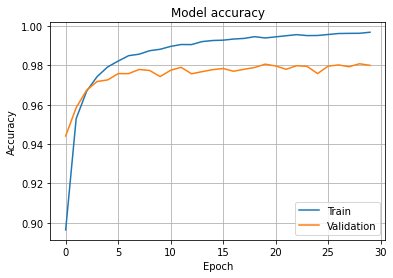

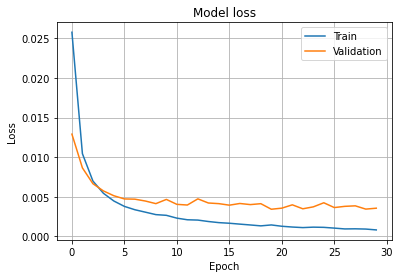

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper_left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.ylabel('Loss')
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()